In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/fictional-lrt-railway-dataset/maintenance_data.csv
/kaggle/input/fictional-lrt-railway-dataset/incident_data.csv
/kaggle/input/fictional-lrt-railway-dataset/feedback_data.csv
/kaggle/input/fictional-lrt-railway-dataset/ridership_data.csv
/kaggle/input/fictional-lrt-railway-dataset/cost_data.csv


## CASE

##### This is a dataset between Mar 2023 - Mar 2024 created by python of a railway LRT information (Dataset is Fictional). The dataset includes how many people riding on the train per day, incedents and maintenance, customer feedback or star rating information, and cost information such as fuel costs and other costs per day. Let's create Exploratory data analysis using python's data analysis libraries such as pandas, numpy, seaborn and matplotlib. After that, we would create a predictive modeling to predict/forecast the ridership (number of passengers using LRT) for the next month using ARIMA Model.

## Step 1: Install Necessary Libraries and map dataframe

* #### let's load the fictional dataset to pandas and install data analysis libraries from python, and have a peak at the first few raws of the dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Load the datasets
df_ridership = pd.read_csv('/kaggle/input/fictional-lrt-railway-dataset/ridership_data.csv')
df_maintenance = pd.read_csv('/kaggle/input/fictional-lrt-railway-dataset/maintenance_data.csv')
df_incident = pd.read_csv('/kaggle/input/fictional-lrt-railway-dataset/incident_data.csv')
df_feedback = pd.read_csv('/kaggle/input/fictional-lrt-railway-dataset/feedback_data.csv')
df_cost = pd.read_csv('/kaggle/input/fictional-lrt-railway-dataset/cost_data.csv')

# Display the first few rows of each dataframe
print("Ridership Data:")
print(df_ridership.head())

print("\nMaintenance Data:")
print(df_maintenance.head())

print("\nIncident Data:")
print(df_incident.head())

print("\nFeedback Data:")
print(df_feedback.head())

print("\nCost Data:")
print(df_cost.head())

Ridership Data:
         Date  Ridership_Count  On_Time_Percentage
0  2023-03-01            12854               94.23
1  2023-03-02            10523               95.89
2  2023-03-03            11671               96.02
3  2023-03-04             9399               89.05
4  2023-03-05             9057               99.31

Maintenance Data:
         Date  Maintenance_Type    Cost       Status
0  2023-12-03            Repair  917.28    Completed
1  2023-06-06  Part Replacement  171.87      Pending
2  2023-07-13  Part Replacement  739.37      Pending
3  2023-09-27  Part Replacement  127.23      Pending
4  2024-03-29            Repair  806.04  In Progress

Incident Data:
         Date  Incident_Type  Response_Time
0  2023-08-10       Accident          20.25
1  2023-10-20  Weather Issue          32.04
2  2023-11-04       Accident          11.24
3  2024-03-26          Delay          37.08
4  2024-02-07          Delay          29.47

Feedback Data:
         Date  Rating                        

## Step 2: Data Cleaning and Preparation
### Check for Missing Values:
#### Identify any missing values in each dataset.

In [3]:
print(df_ridership.isnull().sum())
print(df_feedback.isnull().sum())
print(df_incident.isnull().sum())
print(df_maintenance.isnull().sum())
print(df_cost.isnull().sum())

Date                  0
Ridership_Count       0
On_Time_Percentage    0
dtype: int64
Date       0
Rating     0
Comment    0
dtype: int64
Date             0
Incident_Type    0
Response_Time    0
dtype: int64
Date                0
Maintenance_Type    0
Cost                0
Status              0
dtype: int64
Date           0
Fuel_Cost      0
Energy_Cost    0
Other_Cost     0
dtype: int64


## Step 3: There are no missing Values! its good news, the next step is to findout if all columns have appropriate data values 
### Ensure that all columns have the appropriate data types.

In [4]:
# Convert date columns to datetime

df_cost['Date'] = pd.to_datetime(df_cost['Date']) 
df_feedback['Date'] = pd.to_datetime(df_feedback['Date']) 
df_incident['Date'] = pd.to_datetime(df_incident['Date']) 
df_maintenance['Date'] = pd.to_datetime(df_maintenance['Date']) 
df_ridership['Date'] = pd.to_datetime(df_ridership['Date']) 

## Step 4: Exploratory Data Analysis (EDA)
### Descriptive Statistics:
#### Generate summary statistics for each dataset.

In [5]:
print(df_cost.describe())
print(df_feedback.describe())
print(df_incident.describe())
print(df_maintenance.describe())
print(df_ridership.describe())


                                Date    Fuel_Cost  Energy_Cost  Other_Cost
count                            397   397.000000   397.000000  397.000000
mean   2023-09-14 23:59:59.999999744   988.198766   499.028363  313.176574
min              2023-03-01 00:00:00   501.880000   201.790000  101.460000
25%              2023-06-08 00:00:00   717.000000   340.110000  211.140000
50%              2023-09-15 00:00:00   983.720000   493.250000  319.190000
75%              2023-12-23 00:00:00  1246.670000   660.150000  409.660000
max              2024-03-31 00:00:00  1499.450000   795.810000  499.490000
std                              NaN   294.100855   179.547472  115.096783
                                Date       Rating
count                           1985  1985.000000
mean   2023-09-06 21:40:42.921914368     3.017632
min              2023-03-01 00:00:00     1.000000
25%              2023-05-31 00:00:00     2.000000
50%              2023-09-03 00:00:00     3.000000
75%              2023-12-

## Step 5: Data Visualization
### Let's create some visualizations of the data in cost, feedback, incident, maintenance and ridership datasets

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


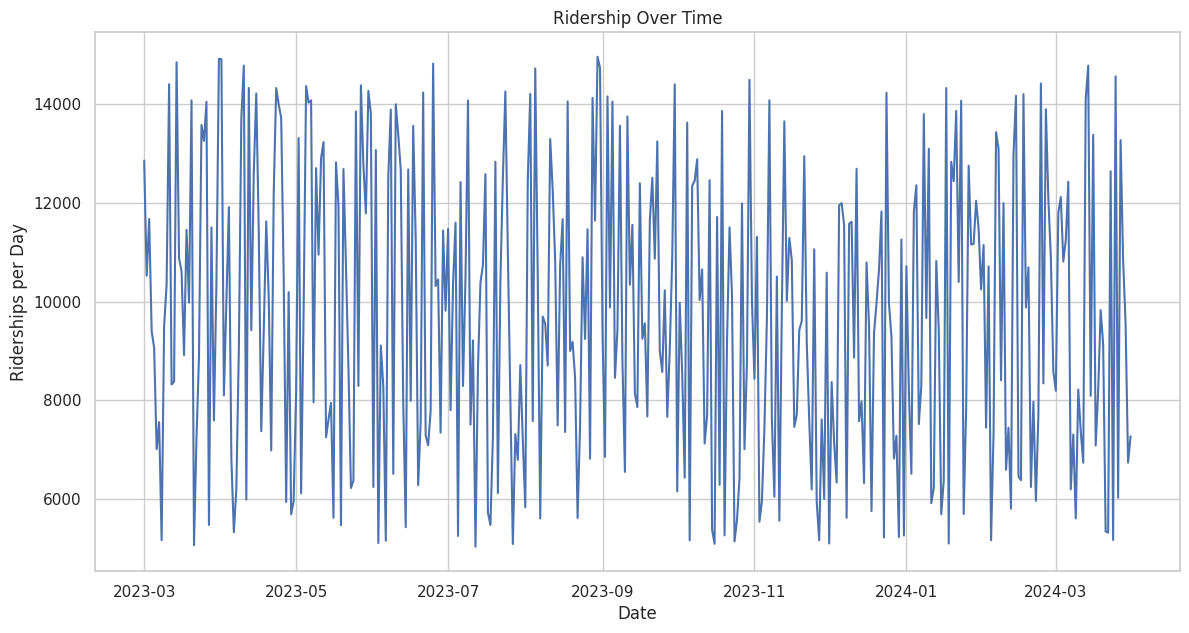

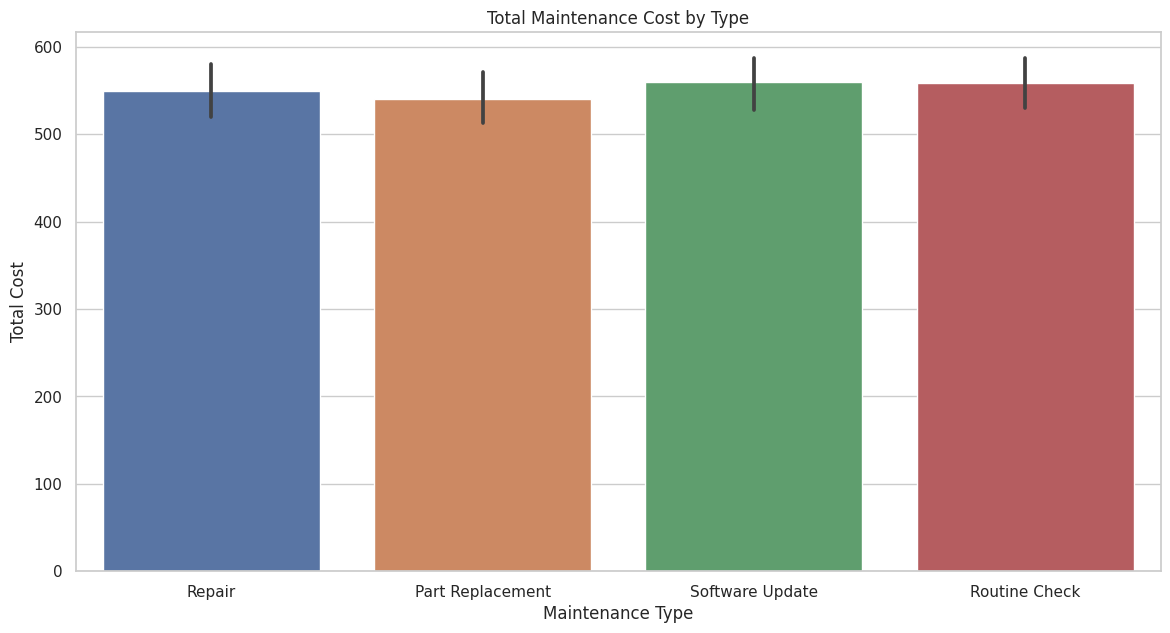

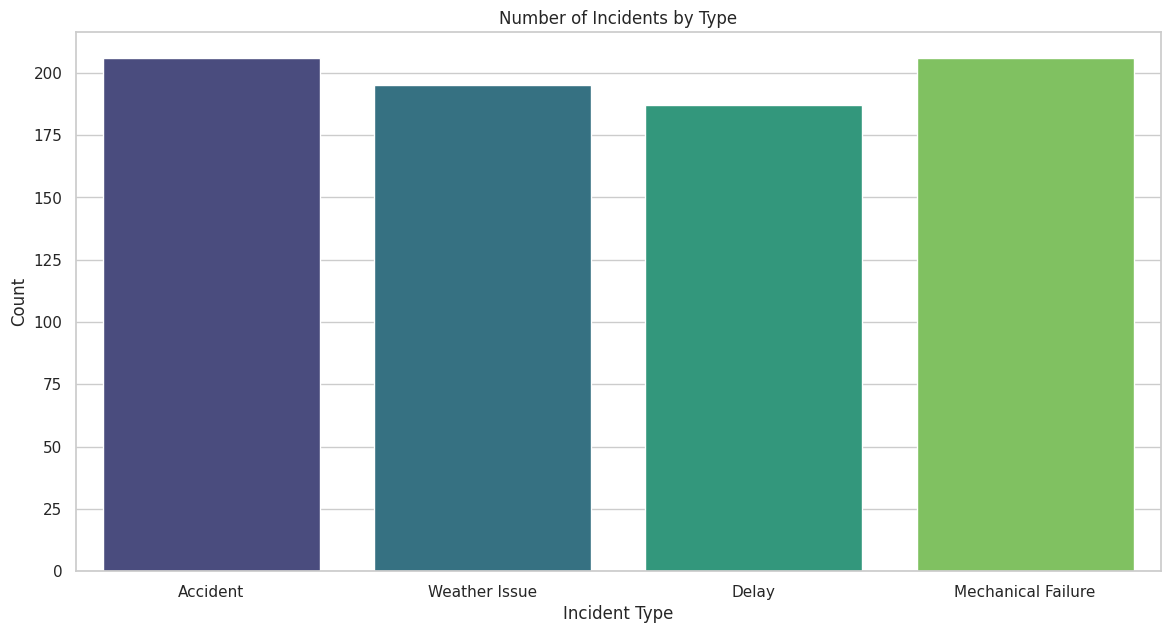

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


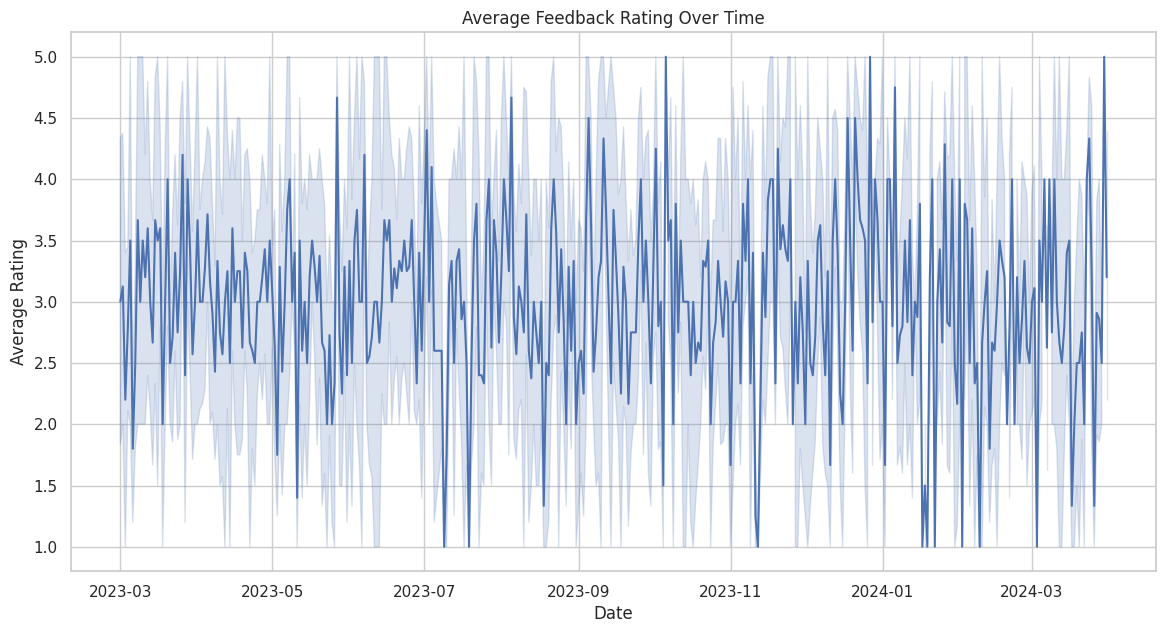

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

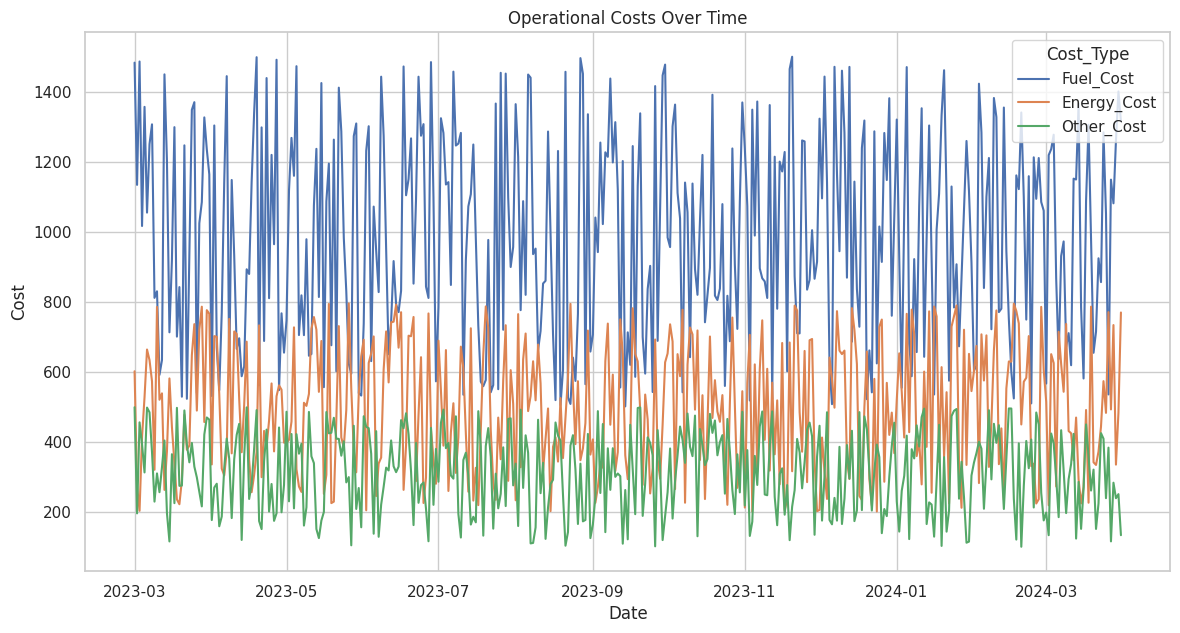

In [6]:
# Set the style for the plots

sns.set(style="whitegrid")

# Ridership over time
plt.figure(figsize=(14, 7))
sns.lineplot(x = 'Date', y = 'Ridership_Count', data = df_ridership)
plt.title('Ridership Over Time')
plt.xlabel('Date')
plt.ylabel('Riderships per Day')
plt.show()

# Maintenance costs by type
plt. figure(figsize = (14,7))
sns.barplot(x = 'Maintenance_Type', y = 'Cost', data = df_maintenance)
plt.title('Total Maintenance Cost by Type')
plt.xlabel('Maintenance Type')
plt.ylabel('Total Cost')
plt.show()

plt.figure(figsize=(14, 7))
sns.countplot(x='Incident_Type', data=df_incident, palette='viridis')
plt.title('Number of Incidents by Type')
plt.xlabel('Incident Type')
plt.ylabel('Count')
plt.show()


# Average feedback rating over time
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Rating', data=df_feedback)
plt.title('Average Feedback Rating Over Time')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.show()

# Operational costs over time
df_cost_melted = df_cost.melt(id_vars=['Date'], value_vars=['Fuel_Cost', 'Energy_Cost', 'Other_Cost'], var_name='Cost_Type', value_name='Cost')
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Cost', hue='Cost_Type', data=df_cost_melted)
plt.title('Operational Costs Over Time')
plt.xlabel('Date')
plt.ylabel('Cost')
plt.show()

## Step 6: Predictive Modeling 
### To make things interesting, let's create a predictive modeling that can predict the April 2024 Ridership count.


### This is called "ARIMA Model"   and it is a widely used statistical analysis model for time series forecasting. Quite suitable for data that can show seasonalities and trends





/tmp/ipykernel_18/1920304870.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_ridership = df_ridership['Ridership_Count'].resample('M').sum()
/tmp/ipykernel_18/1920304870.py:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  monthly_ridership.fillna(method='ffill', inplace=True)


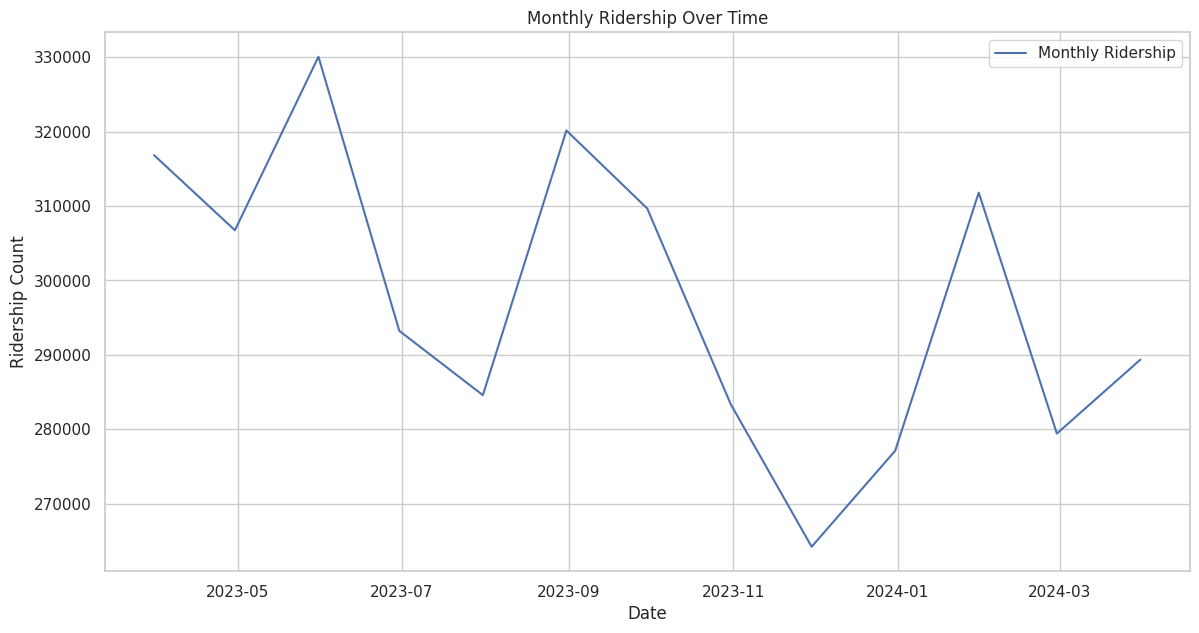

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


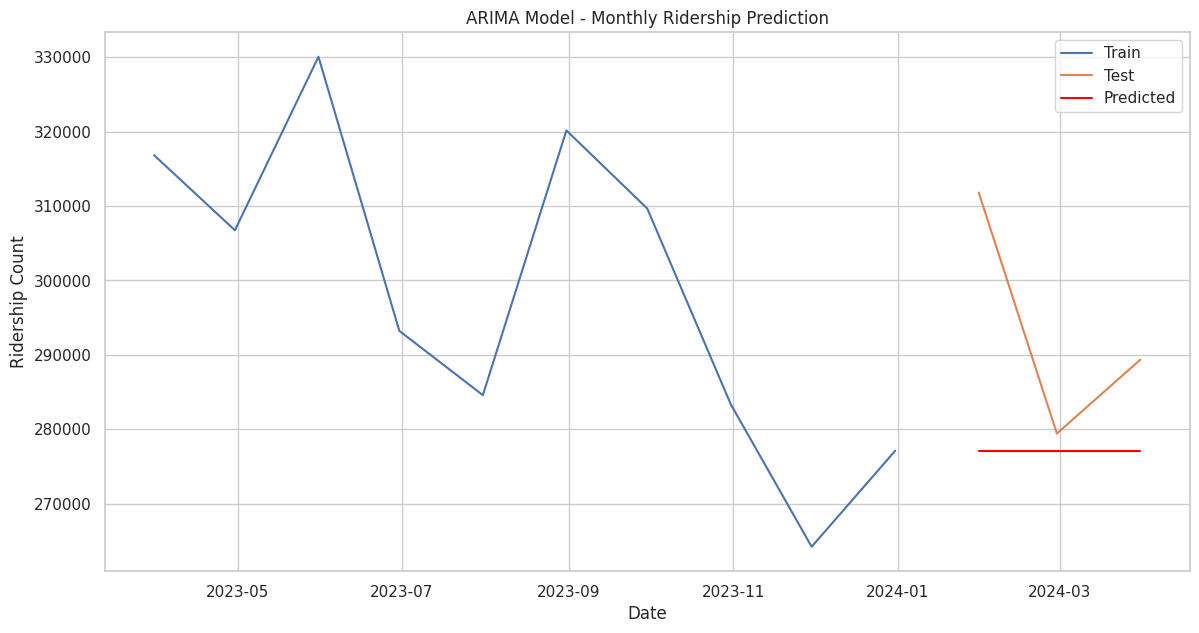

Mean Absolute Error: 16433.32197818915


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

# Load the ridership data
df_ridership = pd.read_csv('/kaggle/input/fictional-lrt-railway-dataset/ridership_data.csv')

# Convert the Date column to datetime format
df_ridership['Date'] = pd.to_datetime(df_ridership['Date'])

# Set the Date column as the index
df_ridership.set_index('Date', inplace=True)

# Resample the data to monthly frequency, summing the ridership counts
monthly_ridership = df_ridership['Ridership_Count'].resample('M').sum()

# Handle any missing values if necessary
monthly_ridership.fillna(method='ffill', inplace=True)

# Visualize the data
plt.figure(figsize=(14, 7))
plt.plot(monthly_ridership, label='Monthly Ridership')
plt.title('Monthly Ridership Over Time')
plt.xlabel('Date')
plt.ylabel('Ridership Count')
plt.legend()
plt.show()

# Split the data into train and test sets (e.g., 80% train, 20% test)
train_size = int(len(monthly_ridership) * 0.8)
train, test = monthly_ridership[:train_size], monthly_ridership[train_size:]

# Define and fit the ARIMA model
model = ARIMA(train, order=(5, 1, 0))  # (p, d, q) order parameters
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=len(test))

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(predictions, label='Predicted', color='red')
plt.title('ARIMA Model - Monthly Ridership Prediction')
plt.xlabel('Date')
plt.ylabel('Ridership Count')
plt.legend()
plt.show()

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(test, predictions)
print(f'Mean Absolute Error: {mae}')


#### Conclution - We can assume around April 2024, there could be about 27,000 to 29,000 passengers as per the ARIMA Model. This model can be trained in realtime data as an AI machine learning model to improve it's accuracy over time. We can use ARIMA Modeling for rest of the data sheets and create predictions for Incidence, maintenance and costs for coming months!